In [1]:
import os
import random
import sys

## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display as display 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns


import tensorflow as tf

py.init_notebook_mode(connected=True)

import moviepy.editor as mp

# from skimage.restoration import denoise_wavelet
## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile as wav
from tqdm import tqdm

from IPython.display import Audio
import matplotlib.pyplot as plt
    
input_duration=3

In [2]:
from pydub import AudioSegment

dir_list = os.listdir('audio/train/') 
dir_list.sort()
print(dir_list)

['paragraph 01', 'paragraph 02', 'paragraph 03', 'paragraph 04', 'paragraph 05', 'paragraph 06', 'paragraph 07', 'paragraph 08', 'paragraph 09', 'paragraph 10', 'paragraph 11', 'paragraph 12', 'paragraph 13', 'paragraph 14', 'paragraph 15', 'paragraph 16']


In [3]:
# for paraFolder in dir_list:
#     file_list = os.listdir('audio/train/' + paraFolder)
#     print(file_list)
#     print(" kgslg " +paraFolder)
    
#     for audiofile in file_list:
#         print(audiofile)
#         name = audiofile.split('.')[0]
#         typ = audiofile.split('.')[1]
#         location = os.path.join("audio/train/" + paraFolder + "/", audiofile)
#         if typ == "3gpp" or typ == "mp4" or typ == "ogg" :
#             clip = mp.AudioFileClip(location)
#             clip.write_audiofile("audio/copy_train/" + paraFolder+"/" + name + ".wav")
#             clip.close()
#         elif typ != "3gpp" or typ != "mp4" :
#             mp4_version = AudioSegment.from_file(location, typ)
#             dst = "audio/copy_train/" + paraFolder+"/" + name + ".wav"
#             mp4_version.export(dst, format="wav")

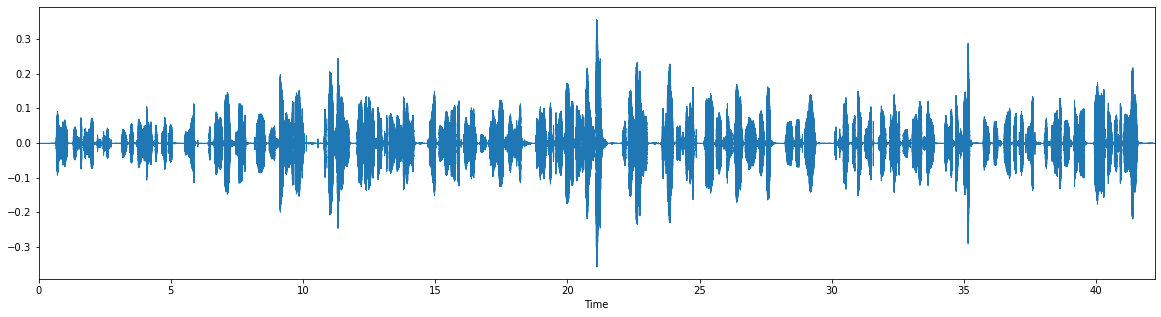

In [4]:
%matplotlib inline

audio_path = 'audio/copy_train/paragraph 01/S33_P1_f.wav'
x , sample_rate = librosa.load(audio_path)
ipd.Audio(x, rate=sample_rate)
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sample_rate)

In [5]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sample_rate)[0]
spectral_centroids.shape

(1819,)

In [6]:
# !pip uninstall scikit-learn
import sklearn

In [7]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Pre-processing of audio signals
### normalization

In [8]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

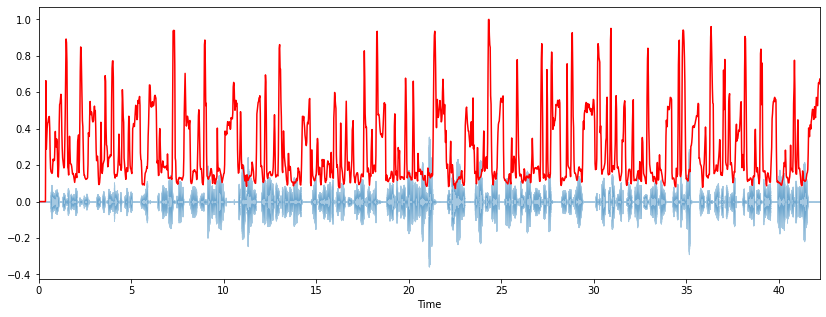

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r') # normalize for visualization purposes

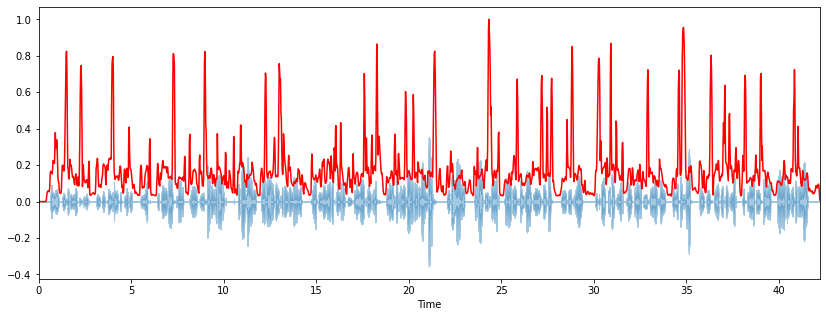

In [10]:
spectral_centroids = librosa.feature.spectral_centroid(x+0.01, sr=sample_rate)[0]
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r') # normalize for visualization purposes

# Spectral Bandwidth

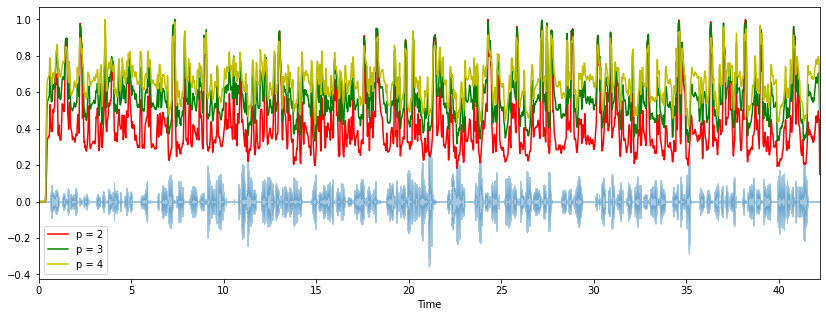

In [11]:
plt.figure(figsize=(14, 5))
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sample_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sample_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sample_rate, p=4)[0]
librosa.display.waveplot(x, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

## Spectral Contrast

In [12]:
spectral_contrast = librosa.feature.spectral_contrast(x, sr=sample_rate)
spectral_contrast.shape

(7, 1819)

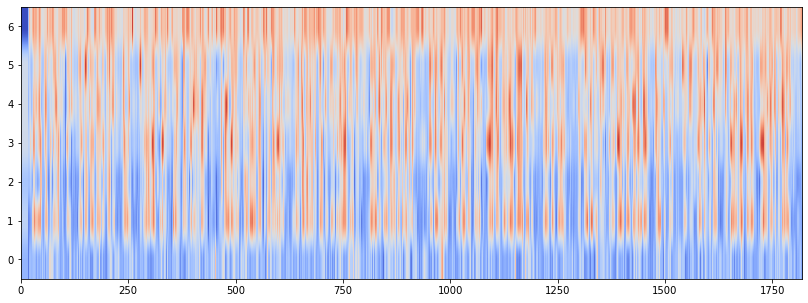

In [13]:
plt.figure(figsize=(14, 5))
plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm')

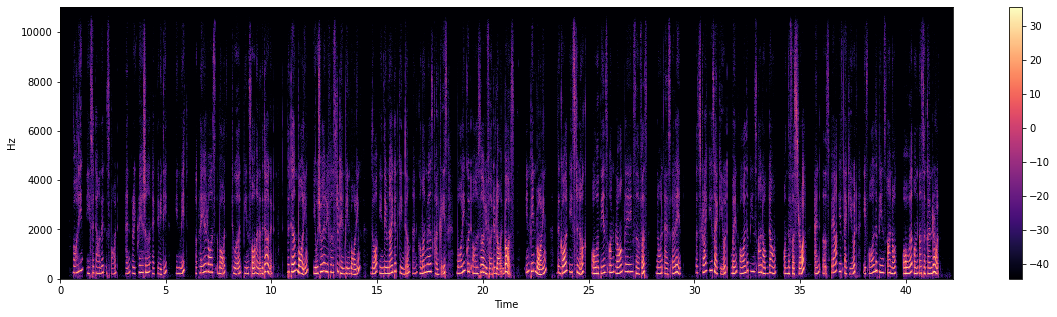

In [14]:
#x: numpy array
X = librosa.stft(x)
#converting into energy levels(dB)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

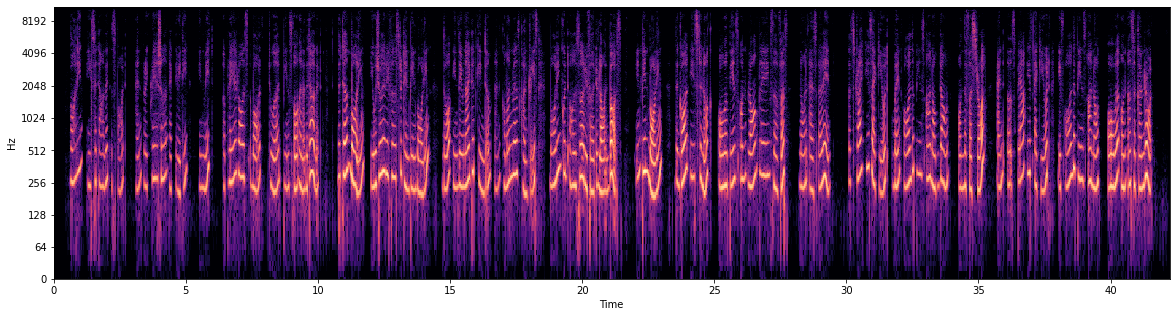

In [15]:
## Log-frequency axis:
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log')

# Spectral Rolloff

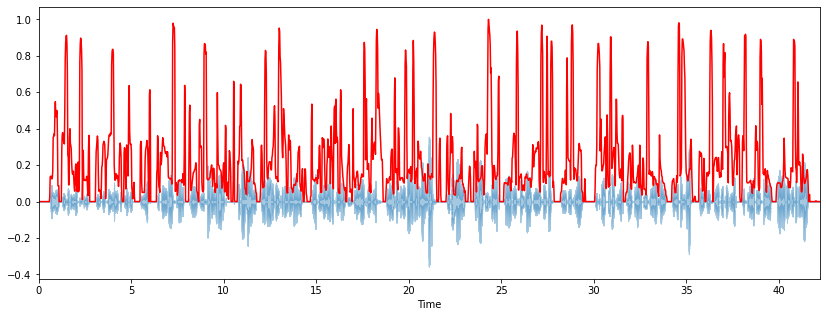

In [16]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sample_rate)[0]
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

# Pre-emphasis
##### Pre-emphasis is done before starting with feature extraction. We do this by boosting only the signal’s high-frequency components, while leaving the low-frequency components in their original states. This is done in order to compensate the high-frequency section, which is suppressed naturally when humans make sounds.

Text(0.5, 1.0, 'Pre-emphasized signal')

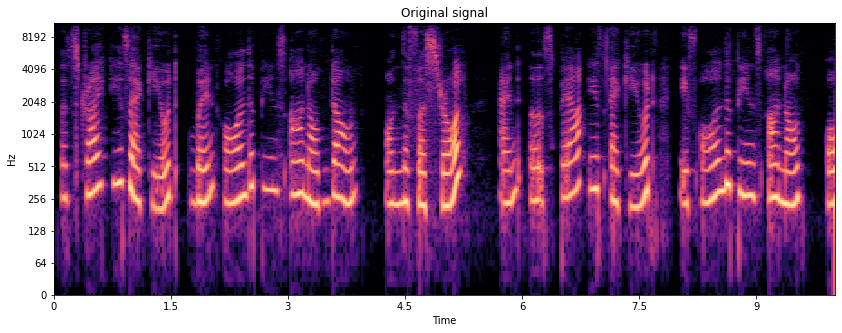

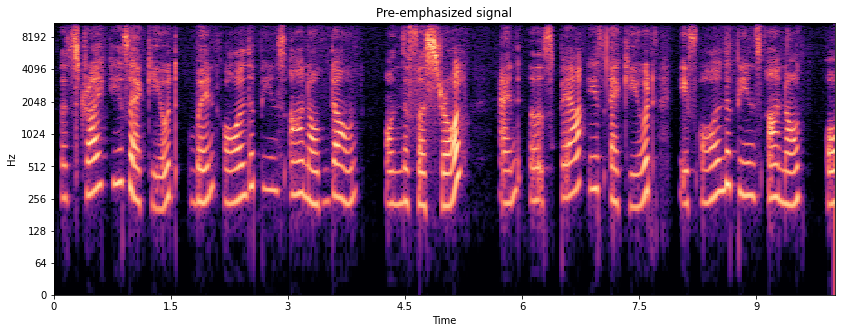

In [17]:
import matplotlib.pyplot as plt
y, sr = librosa.load(audio_path, offset=30, duration=10)
y_filt = librosa.effects.preemphasis(y)
# and plot the results for comparison
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(S_orig, y_axis='log', x_axis='time')
plt.title('Original signal')

plt.figure(figsize=(14, 5))
librosa.display.specshow(S_preemph, y_axis='log', x_axis='time')
plt.title('Pre-emphasized signal')

# mfcc

(20, 1819)


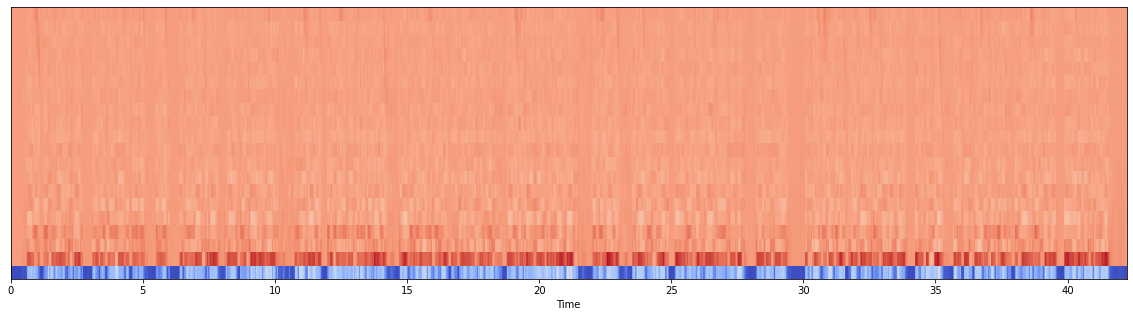

In [18]:
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sample_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [19]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 1.57285485e-09 -6.29141939e-09  0.00000000e+00  0.00000000e+00
 -8.38855918e-09  1.04856990e-09 -6.29141939e-09 -1.04856985e-08
 -2.09713980e-09 -1.25828388e-08 -1.25828388e-08  7.33998906e-09
  4.19427959e-09  0.00000000e+00 -2.09713980e-09  6.29141939e-09
  0.00000000e+00  8.38855918e-09 -4.19427959e-09  0.00000000e+00]
[1.0000001  1.0000001  1.         1.         1.0000001  1.0000001
 1.         1.         0.99999994 1.         1.0000001  0.9999999
 1.         0.99999994 1.0000001  0.9999999  1.0000001  1.
 0.9999999  1.        ]


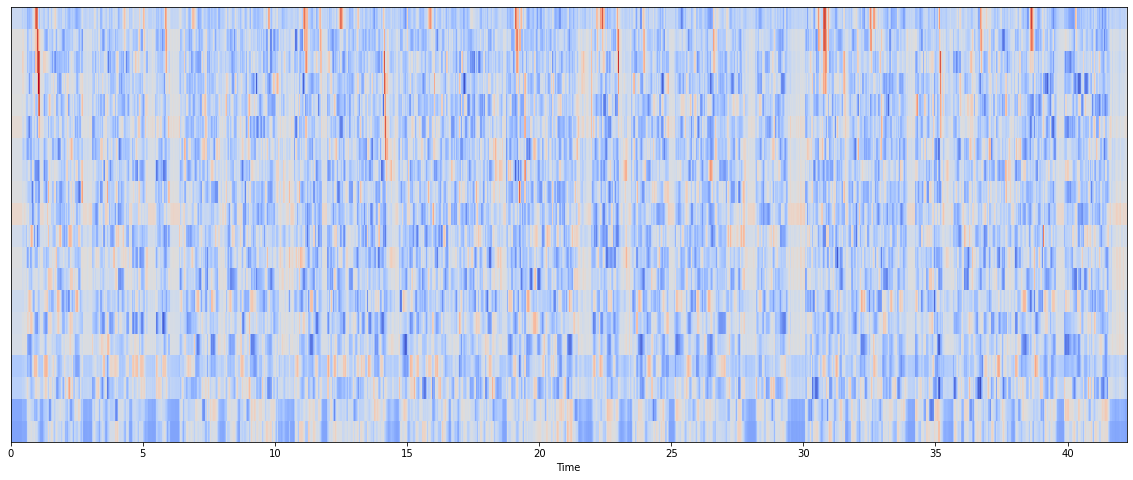

In [20]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [21]:
stft = np.abs(librosa.stft(x))
mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T,axis=0)
chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
mel = np.mean(librosa.feature.melspectrogram(x, sr=sample_rate).T,axis=0)

# plt.figure(figsize=(14, 5))
# librosa.display.specshow(mfccs,sample_rate, x_axis='time',y_axis='log')
# plt.title('Pre-emphasized signal')
print("mfccs ", mfccs)
print("mel ", mel)

mfccs  [-4.6218906e+02  9.4104874e+01  5.8389440e+00  1.4171971e+01
 -1.5986842e+01 -1.0756959e+01 -5.7053070e+00 -1.3799179e+01
 -1.0659865e+01 -5.4241881e+00 -1.5100851e+01 -8.6353083e+00
 -7.2811203e+00 -5.6805358e+00 -1.0037983e+01 -7.3585601e+00
 -7.6774983e+00 -6.5012093e+00 -8.7806520e+00 -2.5470655e+00
 -7.6166859e+00 -6.3293707e-01  1.7609411e+00 -3.2783666e-01
  1.2631032e+00  1.0645007e+00 -5.0485176e-01  3.8875756e+00
  5.0208068e+00  2.8240781e+00  1.5696646e+00  2.0466731e+00
 -1.1400448e+00 -8.0392915e-01 -1.3001915e+00 -3.2485507e+00
 -2.3860178e+00 -2.3708811e+00 -3.1912553e+00 -2.9324727e+00]
mel  [1.5004269e-04 1.0874284e-03 3.9875419e-03 8.8250376e-03 1.1588474e-02
 9.4956709e-03 1.1777803e-01 1.2932023e+00 3.7519236e+00 3.2687316e+00
 2.6774290e+00 3.0809500e+00 2.0570812e+00 5.8404958e-01 2.7889451e-01
 3.7811756e-01 6.7019922e-01 9.6085399e-01 7.3934168e-01 5.0011271e-01
 4.2046860e-01 5.8884150e-01 1.2038699e+00 9.7848165e-01 6.4697003e-01
 3.1062102e-01 2.36268

In [22]:
# data_dir = 'audio/copy_train/paragraph 01/'
# import wave

# CHANNELS = 1
# swidth = 2
# Change_RATE = 2

# spf = wave.open(audio_path, 'rb')
# RATE=spf.getframerate()
# signal = spf.readframes(-1)

# wf = wave.open('changed.wav', 'wb')
# wf.setnchannels(CHANNELS)
# wf.setsampwidth(swidth)
# wf.setframerate(RATE*Change_RATE)
# wf.writeframes(signal)
# wf.close()